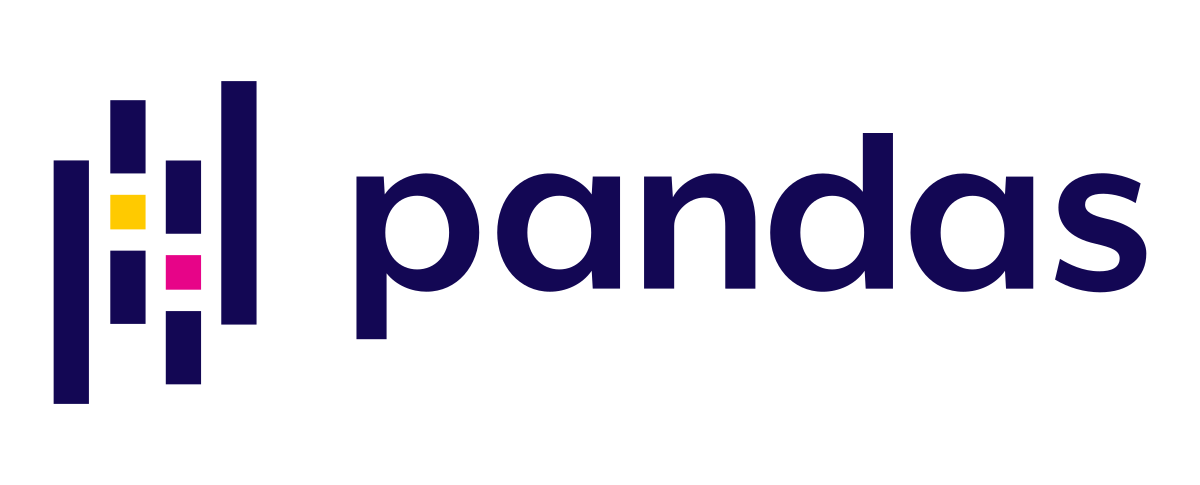

Pandas — программная библиотека на языке Python для обработки и анализа данных. Работа Pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня.

In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

### DataFrame

In [6]:
iris = load_iris()

In [111]:
# Сформируем DataFrame
iris_df = pd.DataFrame(data= iris['data'], columns= iris['feature_names'])

### head, tail, sample, shape, info, colums

In [17]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
iris_df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [20]:
iris_df.sample(5) # random

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
134,6.1,2.6,5.6,1.4
117,7.7,3.8,6.7,2.2
149,5.9,3.0,5.1,1.8
110,6.5,3.2,5.1,2.0
130,7.4,2.8,6.1,1.9


In [21]:
iris_df.shape

(150, 4)

In [22]:
iris_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [23]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### value_counts, unique

In [25]:
iris_df['sepal length (cm)'].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal length (cm), dtype: int64

In [31]:
iris_df['petal length (cm)'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

### iloc, isin, isna/notna

In [68]:
iris_df.iloc[[5,10,15], [0,1]]

,sepal length (cm),sepal width (cm)
5,5.4,3.9
10,5.4,3.7
15,5.7,4.4


In [69]:
iris_df['petal length (cm)'].isin([1,3,4])

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: petal length (cm), Length: 150, dtype: bool

In [70]:
iris_df[iris_df['petal length (cm)'].isin([1,3,4])] # вывести те, где 3 столбец равен 1, 3 или 4

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
53,5.5,2.3,4.0,1.3
62,6.0,2.2,4.0,1.0
71,6.1,2.8,4.0,1.3
89,5.5,2.5,4.0,1.3
92,5.8,2.6,4.0,1.2
98,5.1,2.5,3.0,1.1


In [72]:
iris_df.isna().sum() # пропусков данных нет

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [81]:
iris_df.loc[iris_df['sepal width (cm)'].notna(), 'petal length (cm)'] # если width не nan, то вывести length

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

### copy, concat

In [82]:
df2 = iris_df.copy(deep=True) # происходит "честное" копирование, то есть при изменении iris_df df2 не изменится

In [83]:
df = pd.concat([iris_df,df2]) # соединили как строки

In [112]:
print(iris_df.shape)
print(df2.shape)
print(df.shape)

(150, 4)
(150, 8)
(300, 4)


In [113]:
df2 = pd.concat([iris_df, df2], axis=1) # соединили как столбцы
df2.shape

(150, 12)

### apply

In [114]:
iris_df[iris_df['petal length (cm)'].apply(lambda x: x > 4.5)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
52,6.9,3.1,4.9,1.5
54,6.5,2.8,4.6,1.5
56,6.3,3.3,4.7,1.6
58,6.6,2.9,4.6,1.3
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [144]:
mdf = pd.DataFrame()
mdf['petal length (cm)'] = pd.Series(iris_df['petal length (cm)'].unique())
mdf['long'] = mdf['petal length (cm)'].apply(lambda x: x > 4.5)
mdf.head(5)

,petal length (cm),long
0,1.4,False
1,1.3,False
2,1.5,False
3,1.7,False
4,1.6,False


### merge

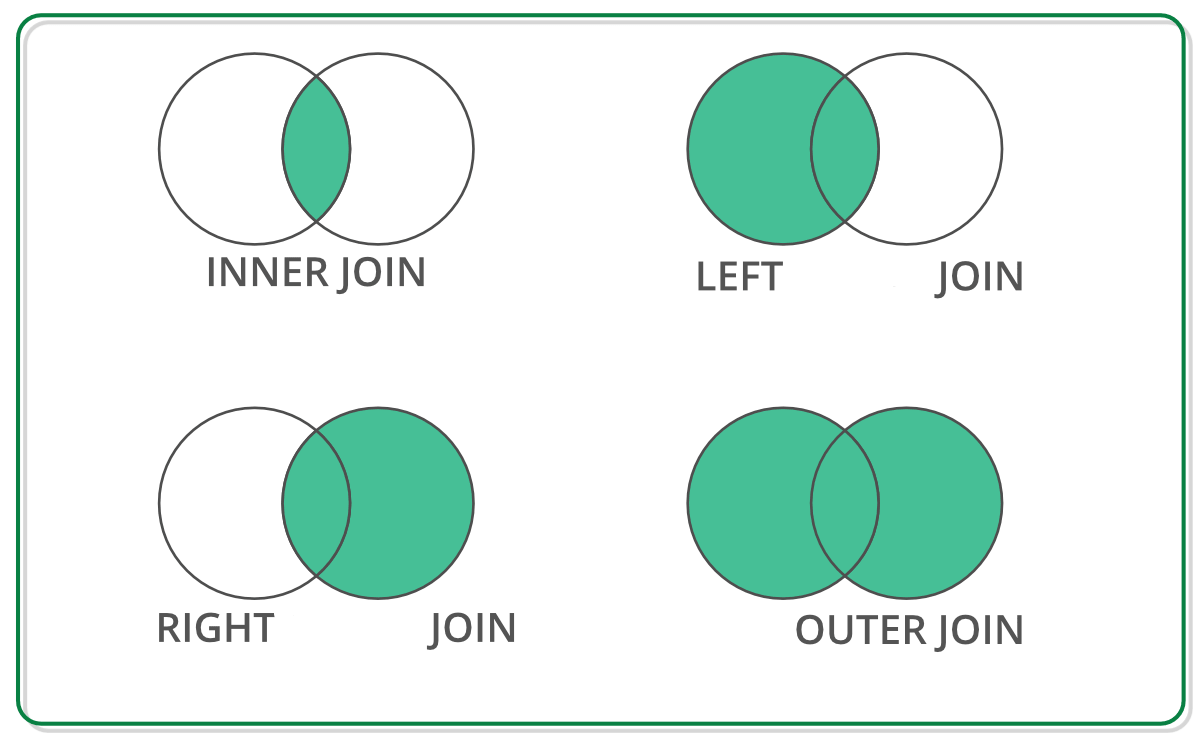

In [147]:
iris_df.merge(mdf, how='left')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),long
0,5.1,3.5,1.4,0.2,False
1,4.9,3.0,1.4,0.2,False
2,4.7,3.2,1.3,0.2,False
3,4.6,3.1,1.5,0.2,False
4,5.0,3.6,1.4,0.2,False
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,True
146,6.3,2.5,5.0,1.9,True
147,6.5,3.0,5.2,2.0,True
148,6.2,3.4,5.4,2.3,True


### describe, median, mean, groupby

In [148]:
iris_df['sepal length (cm)'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

In [149]:
iris_df['sepal length (cm)'].median()

5.8

In [150]:
iris_df.groupby('long')['sepal length (cm)'].describe()

,count,mean,std,min,25%,50%,75%,max
long,,,,,,,,
False,87.0,5.310345,0.531788,4.3,4.95,5.2,5.7,6.7
True,63.0,6.579365,0.553627,5.6,6.20,6.5,6.9,7.9


In [151]:
iris_df.groupby('long')['sepal length (cm)'].agg(['mean','median'])

,mean,median
long,,
False,5.310345,5.2
True,6.579365,6.5


### Корреляция

In [152]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),long
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.758918
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.158950
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.791875
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.797292
long,0.758918,-0.158950,0.791875,0.797292,1.000000


<AxesSubplot:>

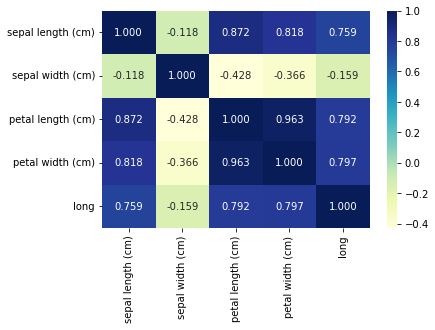

In [153]:
import seaborn as sns
sns.heatmap(iris_df.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

*Корреляция* или *корреляционная зависимость* — статистическая взаимосвязь двух или более случайных величин.
Проверка корреляции признаков позволяет решить две задачи:
+ Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "long"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели. 
+ Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

### plot

<AxesSubplot:ylabel='Frequency'>

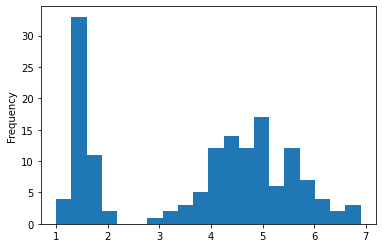

In [163]:
iris_df['petal length (cm)'].plot(kind='hist', bins=20)

In [53]:
forplot = iris_df['petal length (cm)'].value_counts()
forplot

1.4    13
1.5    13
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: petal length (cm), dtype: int64

In [62]:
forplot=forplot.sort_index(inplace=False)

<AxesSubplot:ylabel='Frequency'>

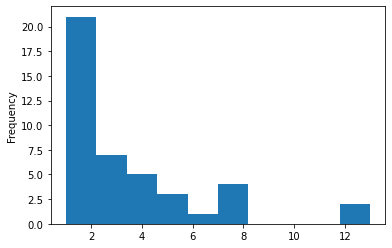

In [160]:
forplot.plot(kind='hist')